In [ ]:

!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 48kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Nov  1 04:19:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2



In [ ]:
dataset_path='/content/drive/My Drive/dataset'
categories=os.listdir(dataset_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(dataset_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
target

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)

In [ ]:
lb = LabelBinarizer()
target = lb.fit_transform(target)
target = to_categorical(target)
target = np.array(target)

In [ ]:

\data

[array([[128, 128, 128, ..., 128, 155, 183],
        [128, 128, 128, ...,  87, 118, 150],
        [128, 128, 128, ...,  68,  96, 114],
        ...,
        [168, 167, 169, ..., 157, 158, 160],
        [167, 168, 170, ..., 158, 159, 160],
        [166, 168, 170, ..., 158, 159, 161]], dtype=uint8),
 array([[127, 127, 128, ...,  30,  40,  56],
        [127, 127, 127, ...,  16,  22,  36],
        [127, 130, 129, ...,  10,  13,  22],
        ...,
        [172, 174, 173, ..., 166, 169, 171],
        [173, 176, 177, ..., 164, 166, 168],
        [175, 178, 179, ..., 161, 163, 164]], dtype=uint8),
 array([[ 89,  90,  98, ..., 219, 219, 219],
        [ 89,  89,  92, ..., 218, 217, 216],
        [ 92,  90,  90, ..., 217, 215, 213],
        ...,
        [ 90,  99, 107, ...,  73,  72,  71],
        [ 90,  96, 101, ...,  71,  72,  69],
        [ 87,  88,  89, ...,  66,  70,  66]], dtype=uint8),
 array([[38, 10,  3, ..., 52, 52, 53],
        [26,  8,  6, ..., 51, 50, 49],
        [11,  6,  8, ..., 57

In [ ]:

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))


In [ ]:
target

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)

Model architecture

In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(175,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(150,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.7))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_3 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 175)       315175    
_________________________________________________________________
activation_4 (Activation)    (None, 47, 47, 175)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 175)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 150)      

In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


In [ ]:
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
119/119 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.7472WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
119/119 [==============================] - 7s 60ms/step - loss: 0.4952 - accuracy: 0.7472 - val_loss: 0.4423 - val_accuracy: 0.7574
Epoch 2/20
119/119 [==============================] - 7s 55ms/step - loss: 0.2943 - accuracy: 0.8809 - val_loss: 0.2233 - val_accuracy: 0.9244
Epoch 3/20
119/119 [==============================] - 6s 54ms/step - loss: 0.1968 - accuracy: 0.9309

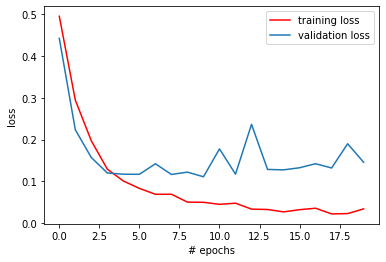

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

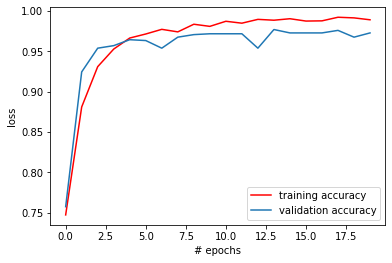

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

17/17 [==============================] - 0s 25ms/step - loss: 0.1439 - accuracy: 0.9735
[0.14386020600795746, 0.9735350012779236]


In [ ]:
model.save('Vhac.h5')